# Reducción de dimensionalidad usando PCA

In [3]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import requests
import io

In [5]:
url = 'https://raw.githubusercontent.com/casasmgb/curso-ml/main/04-section/vehicle-2.csv'
data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [17]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
columns = df.columns
df['class'] = le.fit_transform(df['class'])
df

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

## Verificando Datos faltantes y completandolos

In [23]:
from sklearn.impute import SimpleImputer

df_copy = df.copy()

X = df_copy.iloc[:,0:19] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
df_copy = pd.DataFrame(transformed_values, columns = column )

In [28]:
print("Contando valores del dataset Original: \n", df.isnull().sum())

Contando valores del dataset Original: 
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [27]:
print("\n\nContando valores del dataset con correccion de nulos: \n", df_copy.isnull().sum())



Contando valores del dataset con correccion de nulos: 
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


## Correlacion de datos

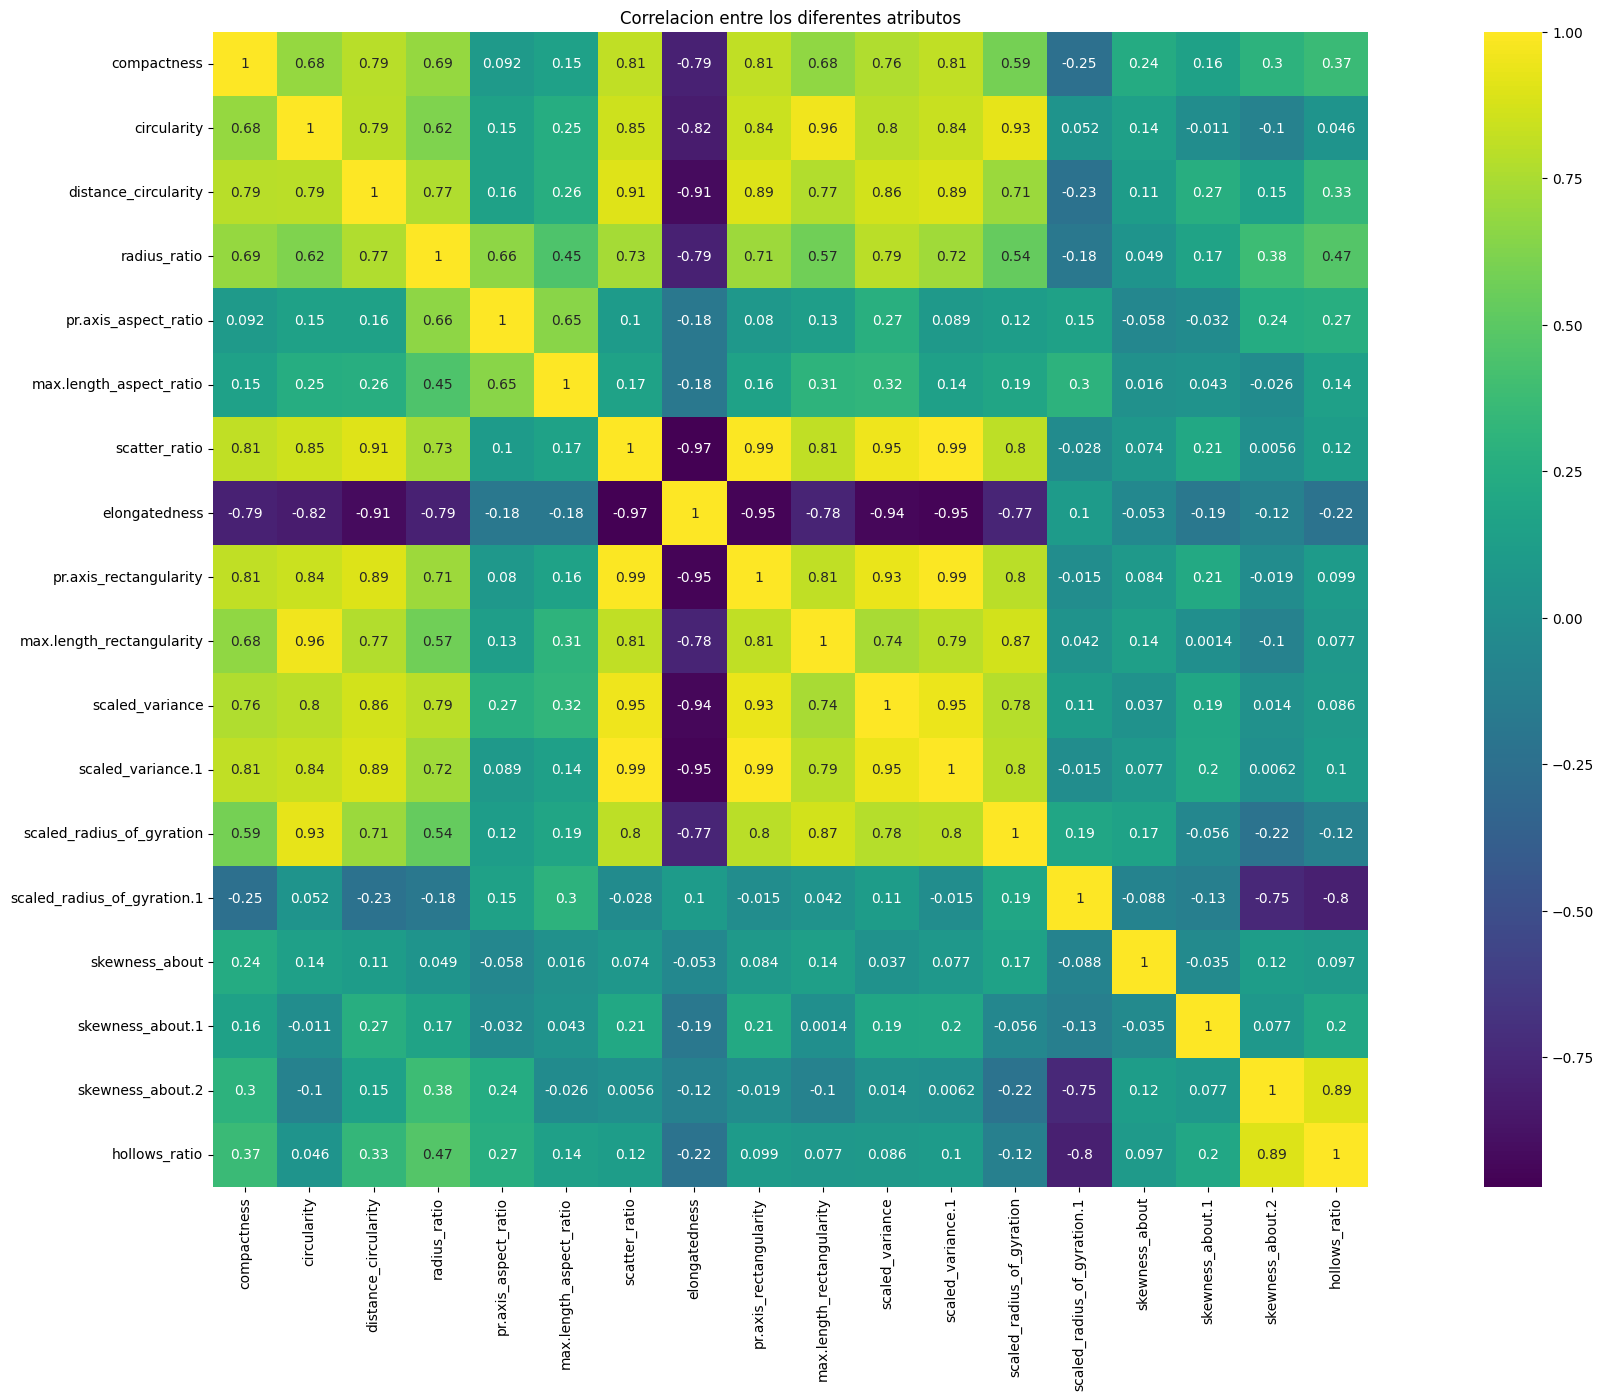

In [31]:
df_corr= df_copy.drop('class', axis=1)

correlation = df_corr.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlacion entre los diferentes atributos')
plt.show()


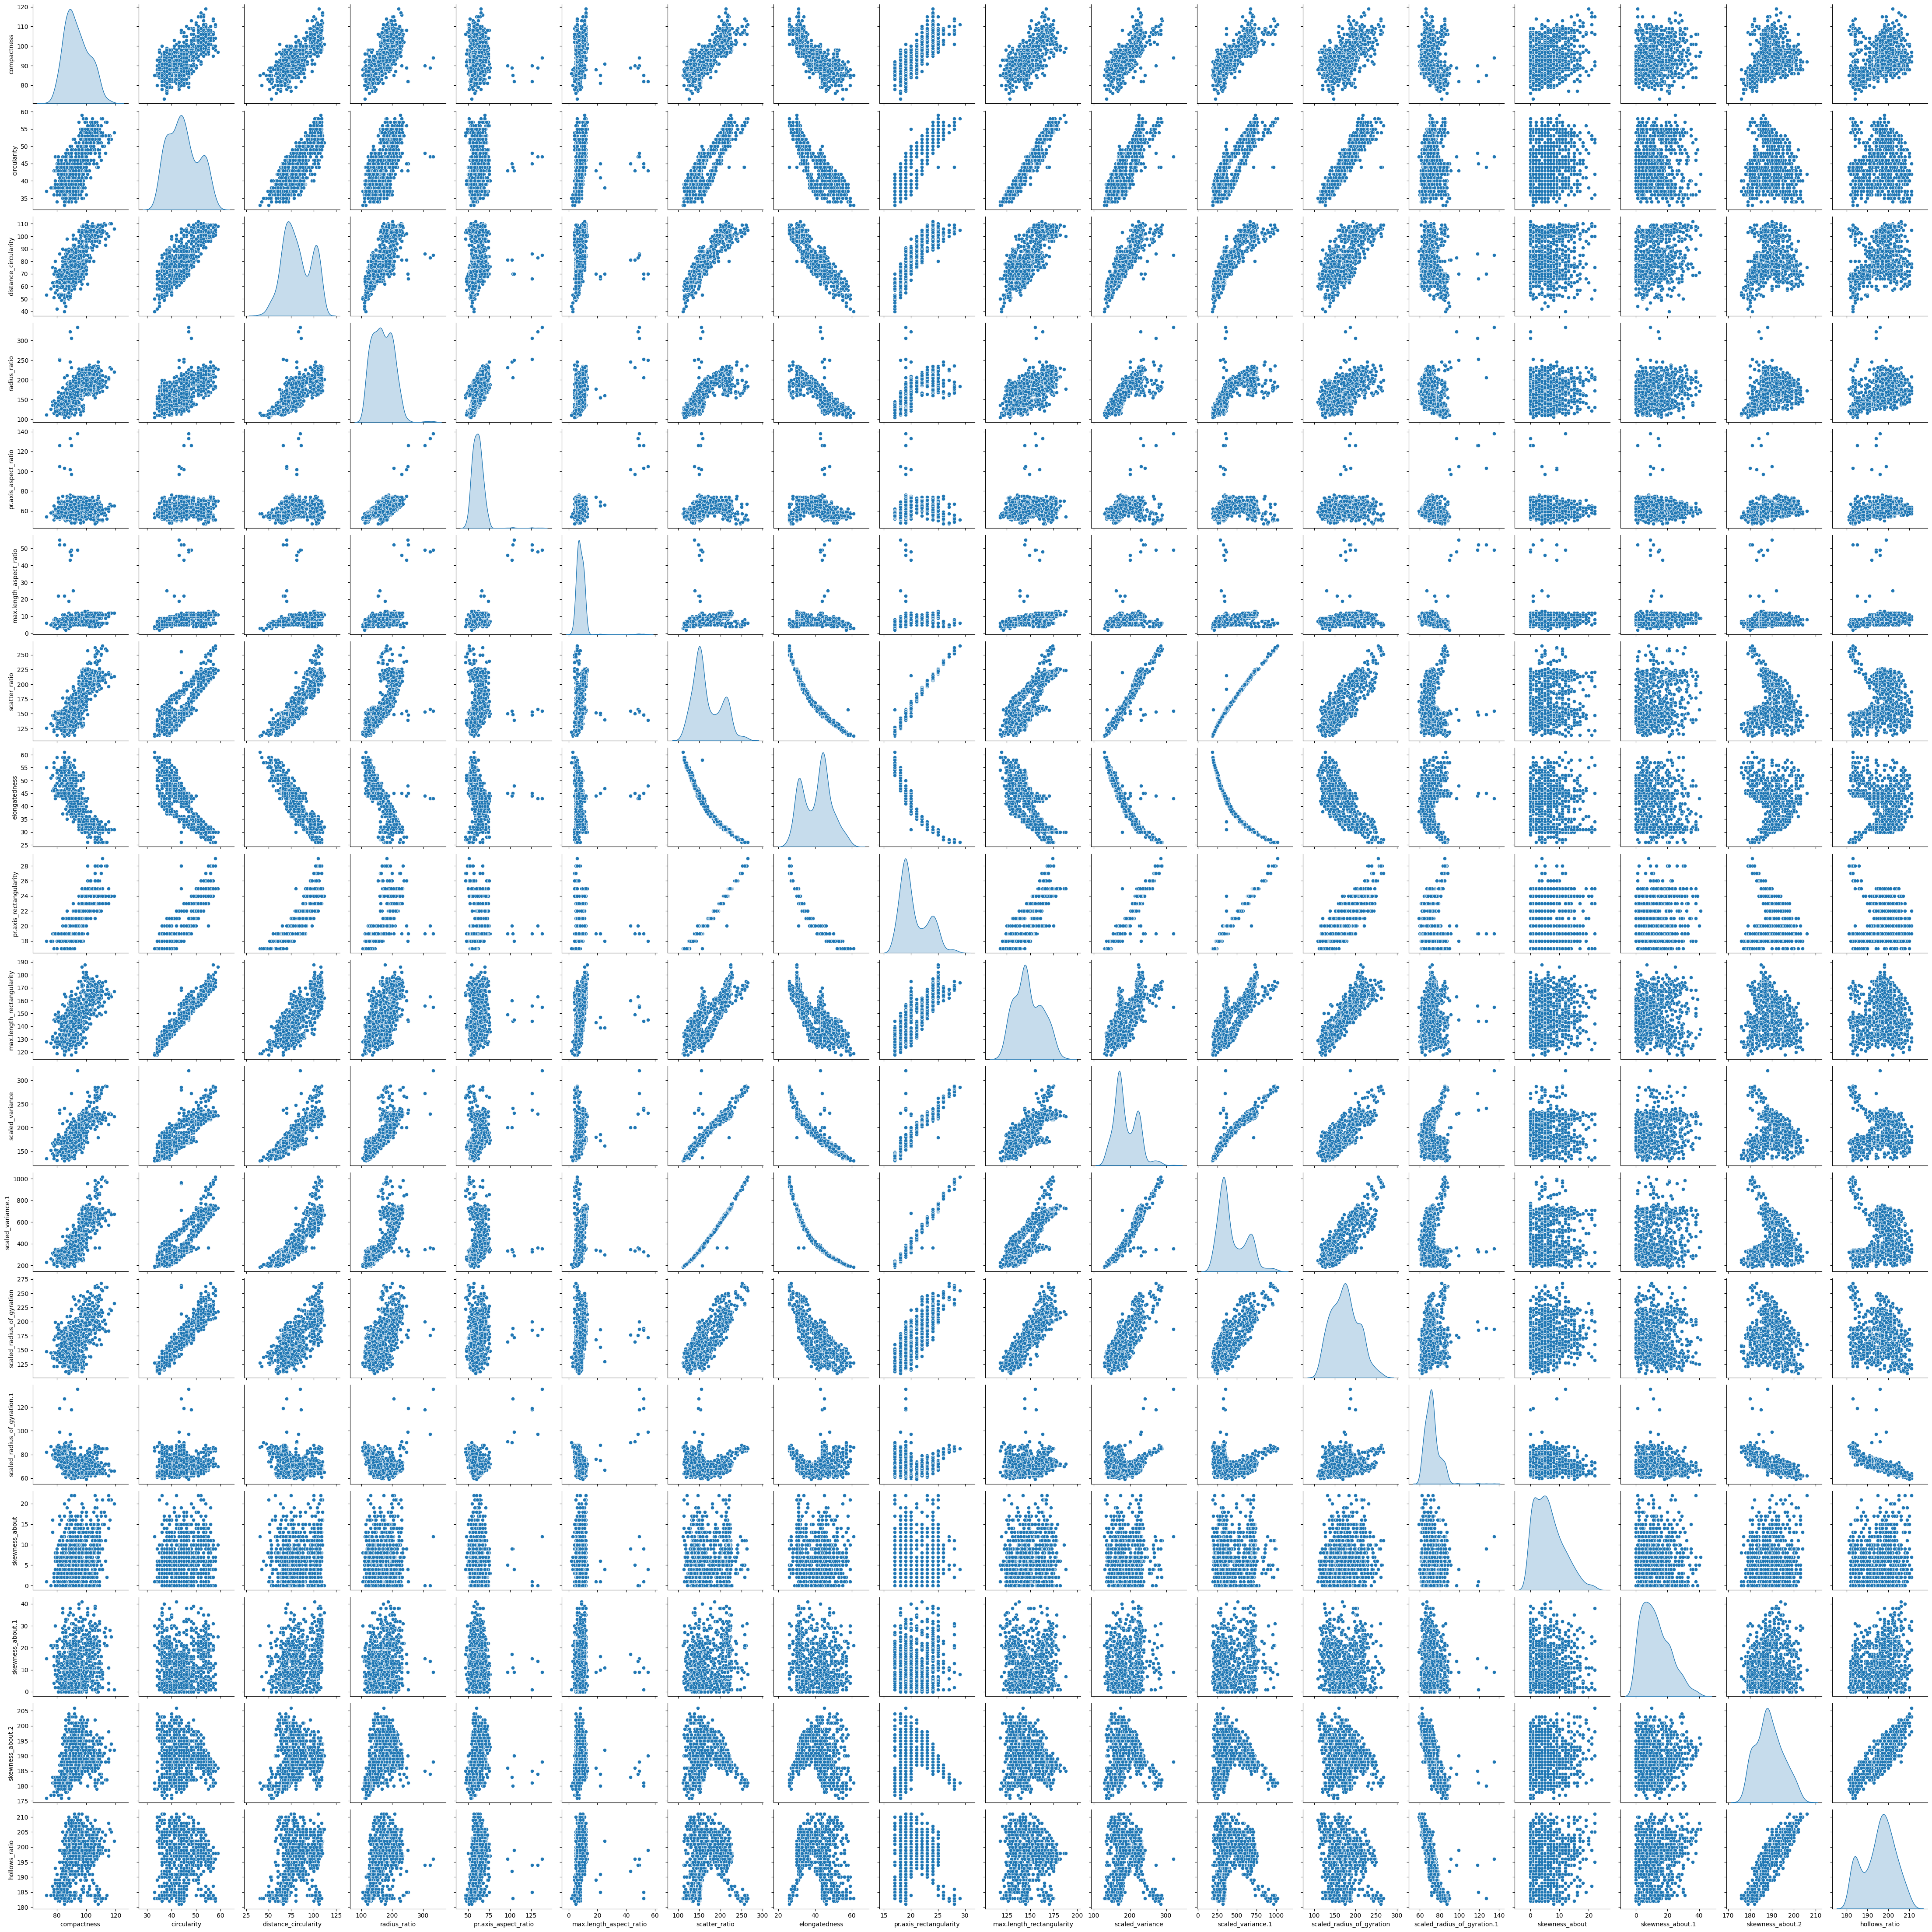

In [33]:
sns.pairplot(df_corr, diag_kind="kde")

Análisis de componentes principales (PCA):

  - Básicamente, PCA es una metodología de reducción de dimensiones que tiene como objetivo reducir un gran conjunto de variables (a menudo correlacionadas) en un conjunto más pequeño de variables (no correlacionadas), llamadas componentes principales, que contiene suficiente información sin perder mucha información relevante.

  - Los componentes principales son nuevas variables que se construyen como combinaciones lineales o mezclas de las variables iniciales. Estas combinaciones se realizan de tal manera que las nuevas variables (es decir, los componentes principales) no están correlacionadas y la mayor parte de la información dentro de las variables iniciales se condensa o comprime en los primeros componentes.

Realizaremos PCA en los siguientes pasos:

  * Dividir nuestros datos en un conjunto de datos de entrenamiento y prueba
  * normalizar el conjunto de tarining usando un escalar estándar
  * Calcular la matriz de covarianza.
  * Calcule los vectores propios y sus valores propios.
  * Ordene los vectores propios de acuerdo con sus valores propios en orden descendente.
  * Elija los primeros vectores propios de K (donde k es la dimensión con la que nos gustaría terminar).
  * Cree un nuevo conjunto de datos con dimensionalidad reducida.

### Dividir nuestros datos en un conjunto de datos de entrenamiento y prueba

In [41]:
x = df_copy.iloc[:,0:18].values
y = df_copy.iloc[:,18].values

print(x.shape, y.shape)

x

(846, 18) (846,)


array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

### normalizar el conjunto de tarining usando un escalar estándar


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std =  sc.fit_transform(x) 
x_std

array([[ 0.16058035,  0.51807313,  0.05717723, ...,  0.3808703 ,
        -0.31201194,  0.18395733],
       [-0.32546965, -0.62373151,  0.12074088, ...,  0.15679779,
         0.01326483,  0.45297703],
       [ 1.25419283,  0.84430302,  1.51914112, ..., -0.40338349,
        -0.14937355,  0.04944748],
       ...,
       [ 1.49721783,  1.49676282,  1.20132288, ..., -0.96356477,
        -0.31201194,  0.72199673],
       [-0.93303214, -1.43930625, -0.26064101, ...,  1.38919659,
         0.17590322, -0.08506238],
       [-1.05454464, -1.43930625, -1.02340478, ...,  0.60494281,
        -0.47465032, -0.75761164]])

### Calcular la matriz de covarianza.
En estadística y teoría de la probabilidad, la matriz de covarianza es una matriz cuadrada que contiene la covarianza entre los elementos de un vector.
La covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

In [42]:
cov_matrix = np.cov(x_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)



cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

### Calcule los vectores propios y sus valores propios.

|eigenvalores|eigenvectores|
|-|-|

En álgebra lineal, los vectores propios, eigenvectores o autovectores de un operador lineal son los vectores no nulos que, cuando son transformados por el operador, dan lugar a un múltiplo escalar de sí mismos, con lo que no cambian su dirección.

In [44]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

### Ordene los vectores propios de acuerdo con sus valores propios en orden descendente.

In [46]:


# creamon un conjunto de pares (valores propios, vectores propios):
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# ordenamos los pares (valor propio, vector propio) de mayor a menor con respecto al valor propio
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# separamos los valores propios y los vectores propios ordenados de forma descendente
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Valores propios en orden descendente: \n%s' %eigvalues_sorted)



[(9.404602609088712, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524634, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389683, array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
        0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
        0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
       -0.07528289,  0.00873592,  0.03952427])), (1.1799374684450206, array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
        0.03141473, -0.09574857,  0.0822902 , -0.0

### Elija los primeros vectores propios de K (donde k es la dimensión con la que nos gustaría terminar).

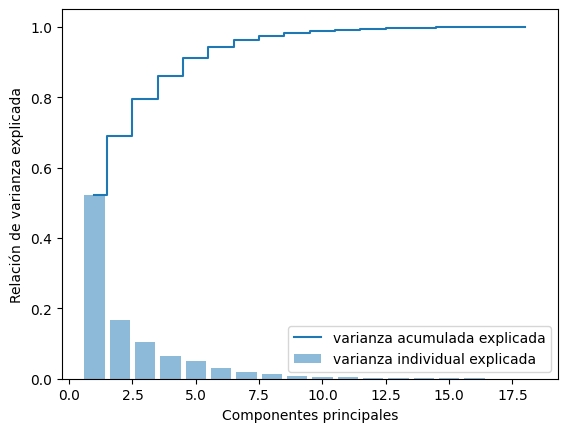

In [53]:
total = sum(eigenvalues)

# creamos una matriz de varianza explicada por cada vector propio... habrá 18 entradas ya que hay 18 vectores propios
var_explained = [(i / total) for i in sorted(eigenvalues, reverse=True)]  
# una matriz de varianza acumulada. Habrá 18 entradas con 18 entradas acumuladas alcanzando casi el 100%
cum_var_exp = np.cumsum(var_explained)  


plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='varianza individual explicada')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='varianza acumulada explicada')
plt.ylabel('Relación de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc = 'best')
plt.show()

Esta gráfica te ayudará a comprender cuánta información se retiene en función del número de componentes principales utilizados para la reducción de dimensionalidad. 

Se puedes observar cómo la varianza acumulada explicada aumenta a medida que se añaden más componentes principales, lo que te da una idea de cuánta información se está conservando en los datos reducidos.


### Cree un nuevo conjunto de datos con dimensionalidad reducida.

In [54]:
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducimos las dimensiones

X_std_8D = np.dot(x_std,P_reduce.T)   # proyección de datos originales en dimensiones de componentes principales

reduced_pca = pd.DataFrame(X_std_8D)  # convertimos los datos a un dataframe

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026   1.001584  0.176612  0.079301  0.757447  0.901124   
1   -1.591711  0.420603  -0.369034  0.233234  0.693949  0.517162 -0.378637   
2    3.769324 -0.195283   0.087859  1.202212  0.731732 -0.705041  0.034584   
3   -1.738598  2.829692   0.109456  0.376685 -0.362897  0.484431 -0.470753   
4    0.558103 -4.758422  11.703647  0.147464  3.256953  0.203446 -2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884   0.197213 -1.444958  1.065425 -0.820179  0.041563   
842 -0.314956 -0.164511   0.794573 -0.908272 -0.235492  1.438257  0.599113   
843  4.809174  0.001249   0.532333  0.295652 -1.344236  0.217070 -0.573249   
844 -3.294092  1.008276  -0.357003 -1.933675  0.042768  0.402491  0.202406   
845 -4.765053 -0.334900  -0.568136 -1.224807 -0.054051  0.335637 -0.058098   

            7  
0   -0.381106  
1    0.247059  
2    0.482772  
3   -0.023086  
4   -0.448854  
..        ...  
841  0.506991  
842 -0.153086  
843  0.110478  
844  0.320622  
845 -0.248035  

[846 rows x 8 columns]

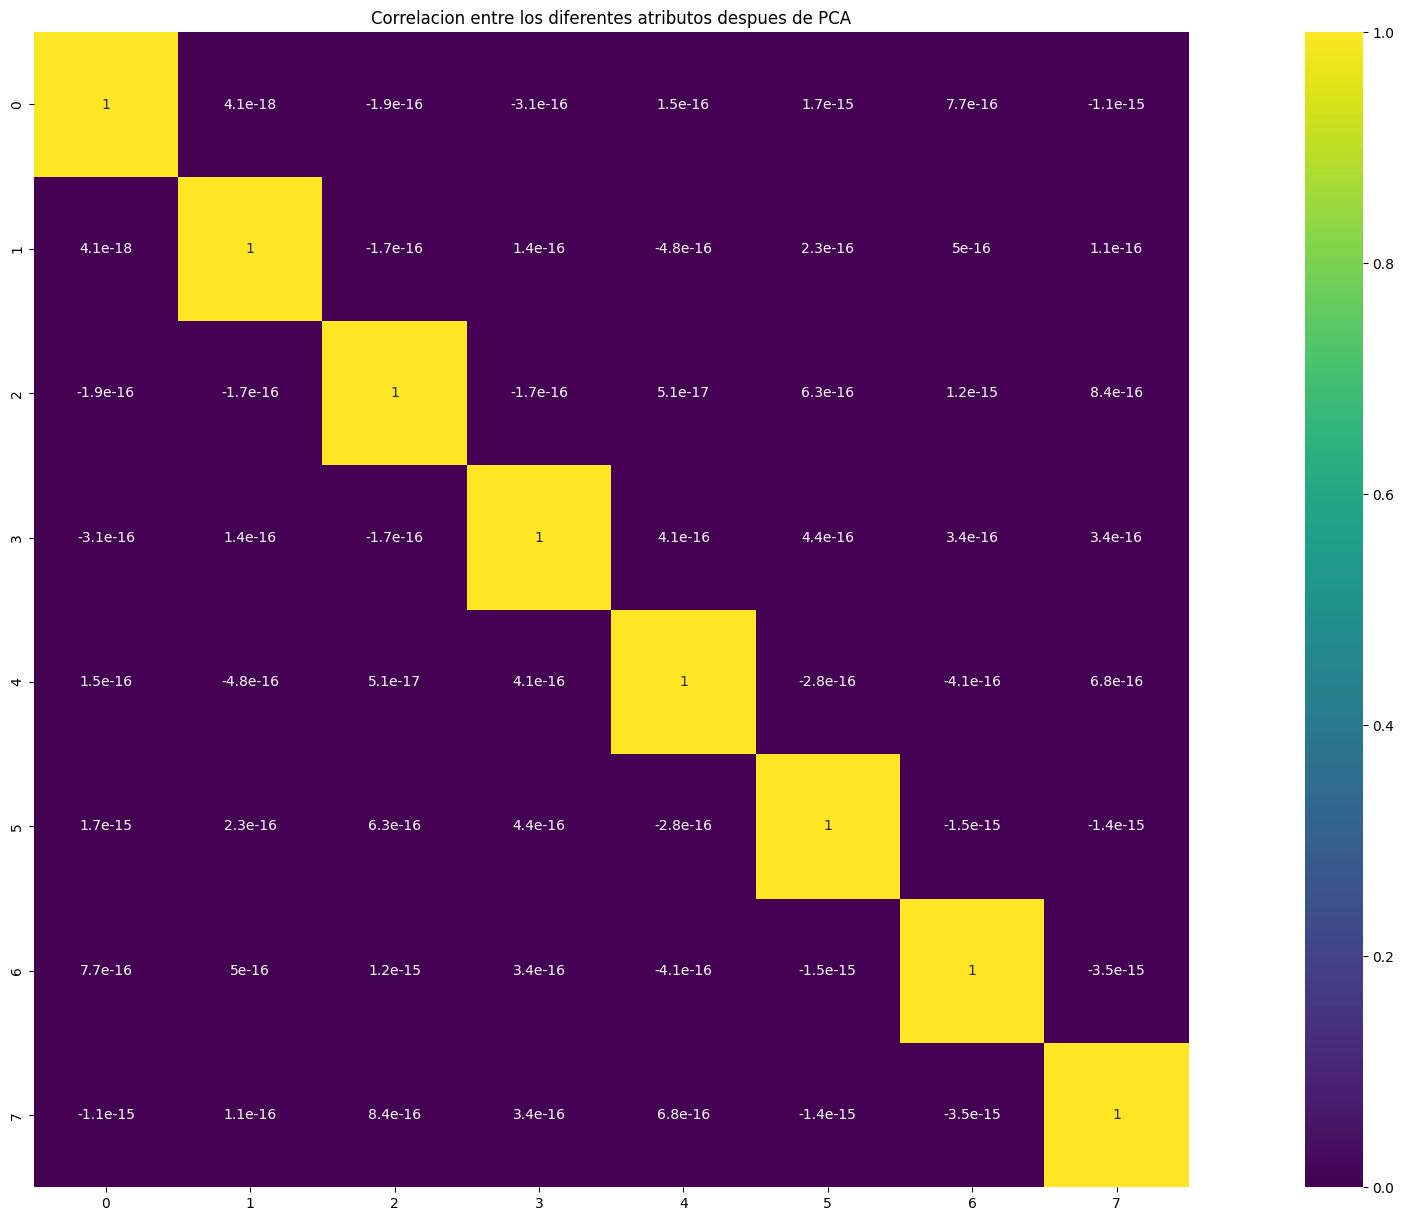

In [60]:
pca_correlation = reduced_pca.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(pca_correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlacion entre los diferentes atributos despues de PCA')
plt.show()


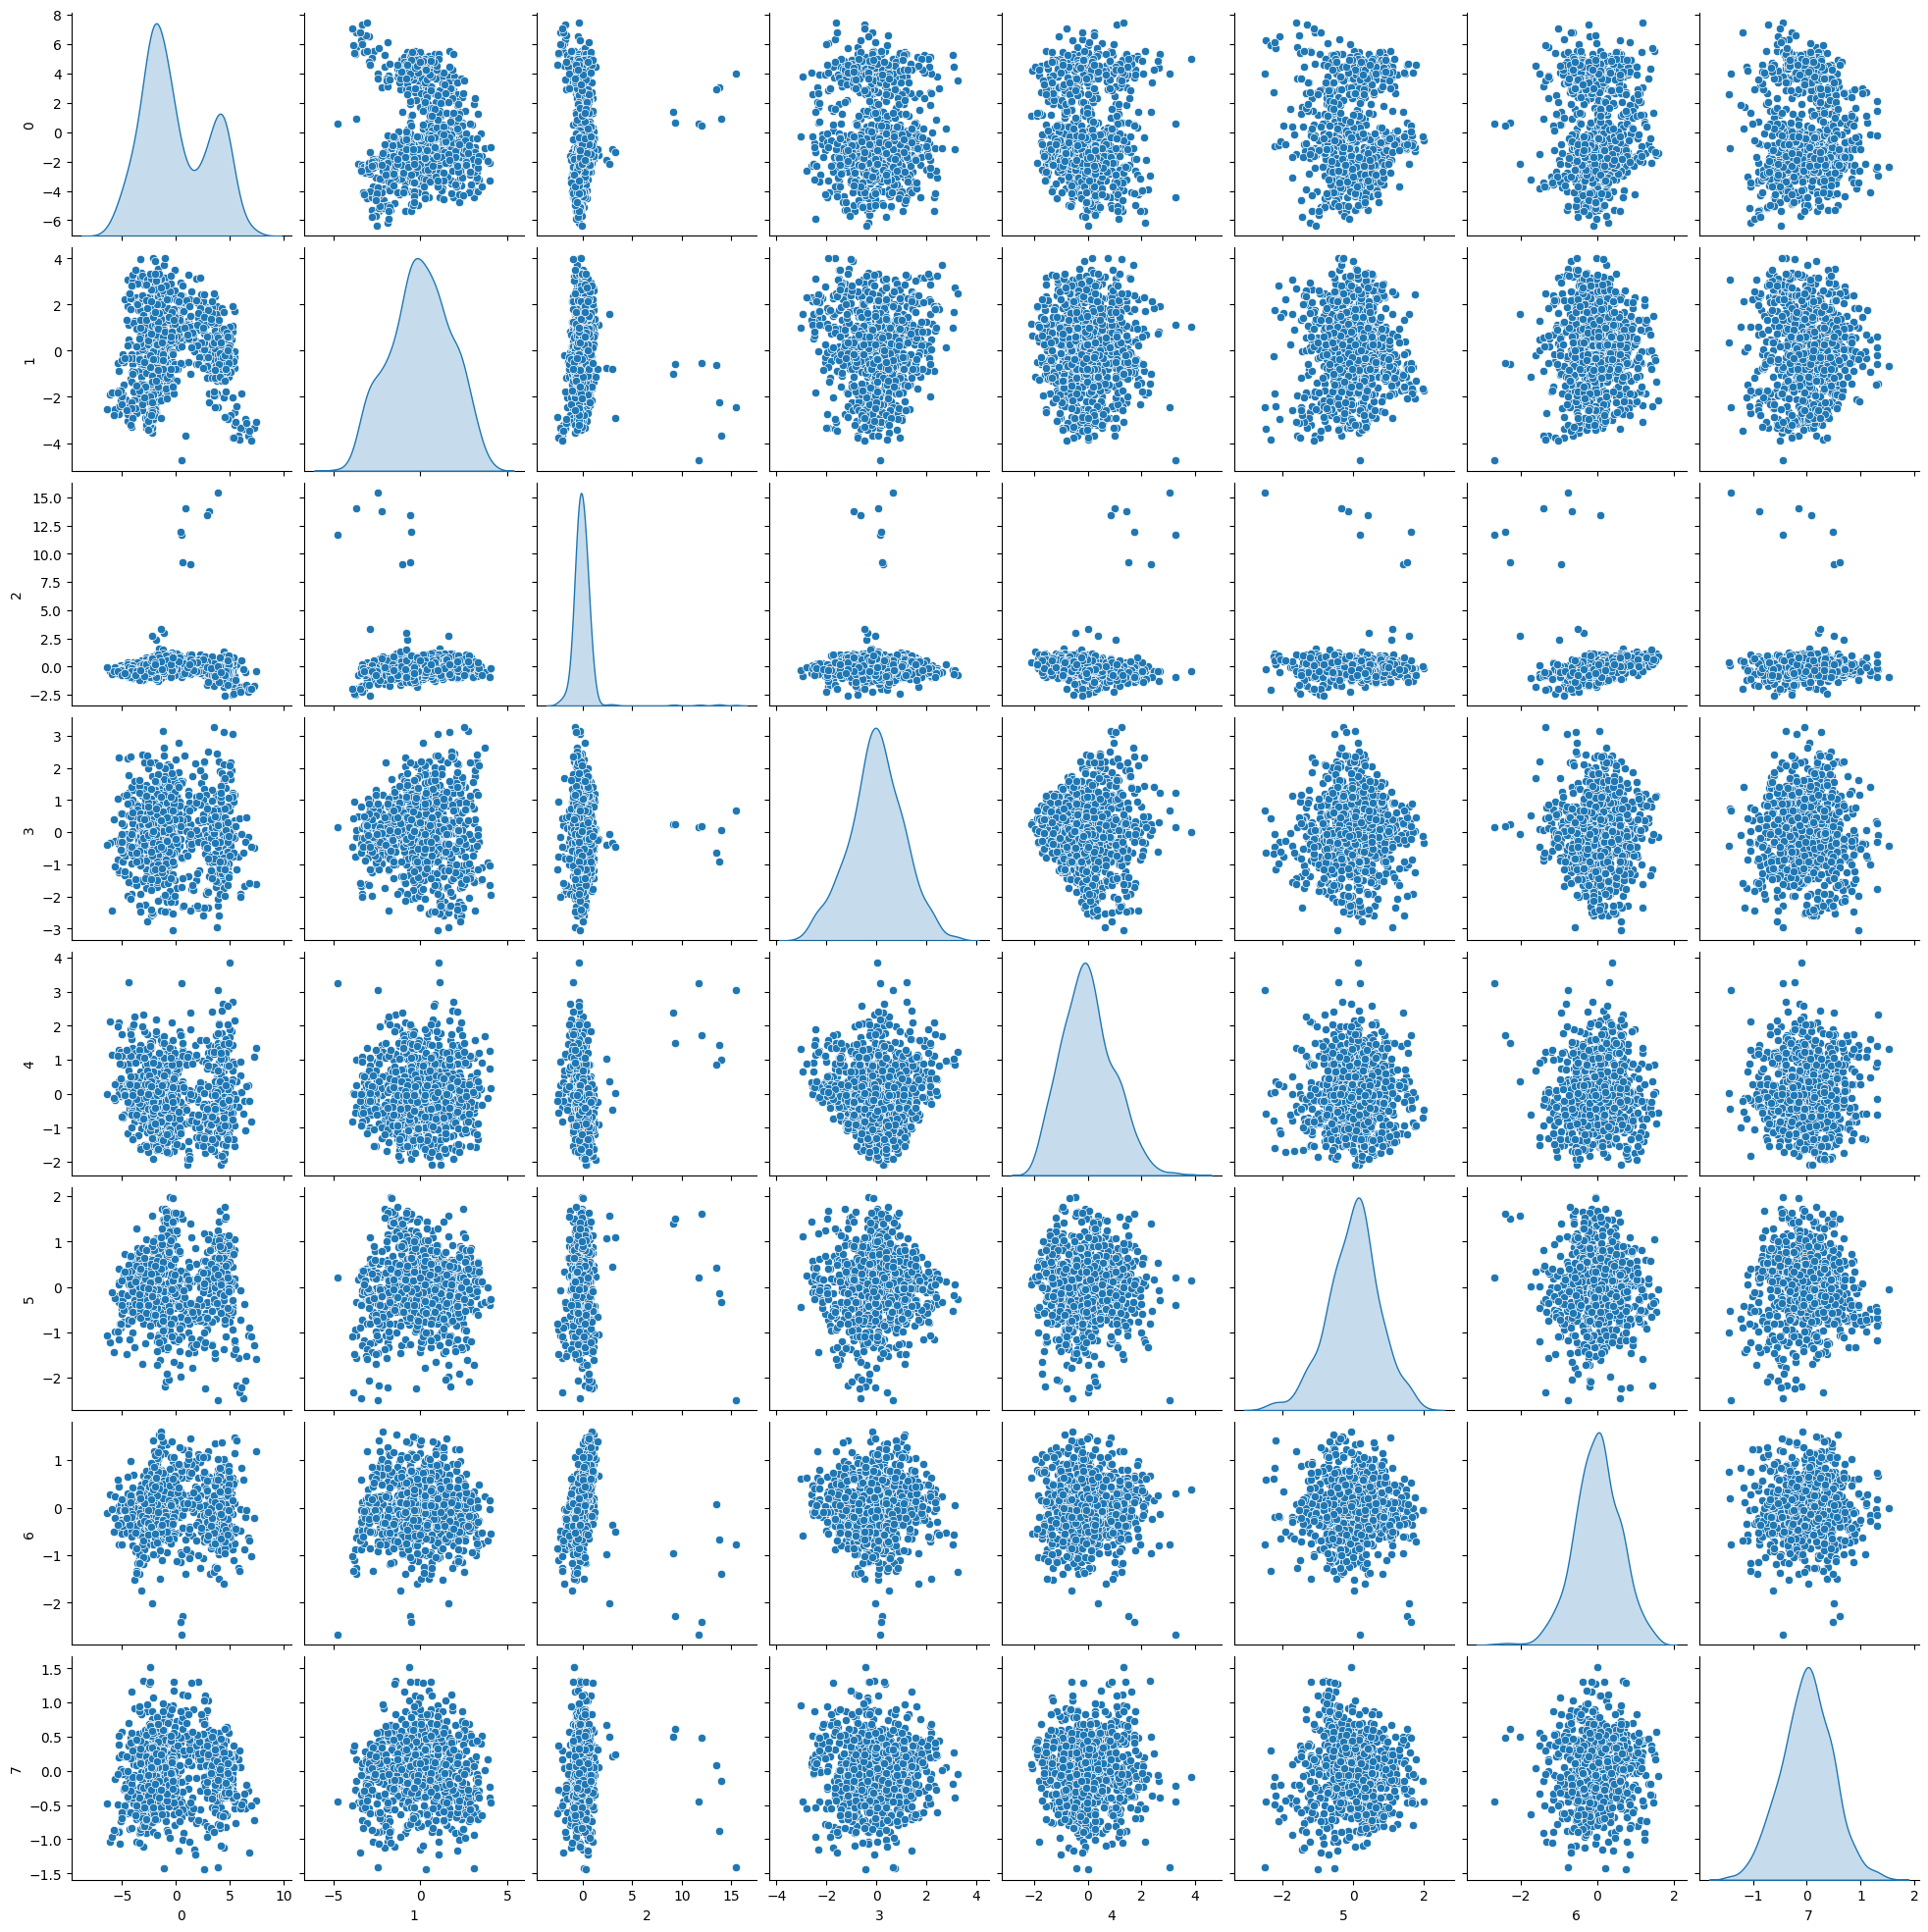

In [55]:
sns.pairplot(reduced_pca, diag_kind='kde') 

## Entrenamos un modelo con los datos originales y con los datos reducidos

In [86]:
# Datos originales
orig_x_train, orig_x_test, orig_y_train, orig_y_test = train_test_split(x_std, y, test_size=0.30, random_state=1)

#Datos reducidos con PCA
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(reduced_pca, y, test_size=0.30, random_state=1)

In [87]:
svc = SVC()
svc.fit(orig_x_train, orig_y_train)

orig_y_predict = svc.predict(orig_x_test)

In [88]:
svc1 = SVC()
svc1.fit(pca_x_train, pca_y_train)

pca_y_predict = svc1.predict(pca_x_test)

In [89]:
# mostrar puntuación de precisión de ambos modelos

print("Puntuación del modelo en los datos originales",svc.score(orig_x_test, orig_y_test))
print("Puntuación del modelo en la dimensión PCA reducida",svc1.score(pca_x_test, pca_y_test))

print("Antes de PCA en la dimensión 18 original",accuracy_score(orig_y_test, orig_y_predict))
print("Después de PCA (en 8 dimensiones)",accuracy_score(pca_y_test, pca_y_predict))

Puntuación del modelo en los datos originales 0.952755905511811
Puntuación del modelo en la dimensión PCA reducida 0.937007874015748
Antes de PCA en la dimensión 18 original 0.952755905511811
Después de PCA (en 8 dimensiones) 0.937007874015748


In [90]:
orig_y_test

array([2., 0., 0., 0., 1., 1., 2., 2., 2., 2., 2., 2., 0., 1., 0., 1., 2.,
       1., 1., 0., 1., 1., 1., 1., 2., 2., 0., 1., 1., 1., 1., 2., 0., 1.,
       2., 1., 0., 1., 0., 0., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 2., 1., 1., 2., 0., 1., 2., 1., 2., 0., 1., 1., 1.,
       1., 0., 1., 2., 1., 2., 0., 1., 1., 1., 2., 1., 1., 2., 1., 1., 0.,
       1., 2., 1., 0., 0., 1., 0., 2., 1., 2., 2., 0., 0., 0., 1., 1., 1.,
       2., 2., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 2., 2.,
       1., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 2., 1., 2., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 0., 2., 1., 0., 1., 1., 0., 1., 1., 2., 1., 0.,
       2., 0., 2., 1., 1., 0., 2., 1., 2., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 2., 1., 0., 0., 1., 2., 0., 1., 1., 1., 0., 2., 1., 2., 1.,
       2., 0., 1., 2., 1., 1., 0., 1., 0., 1., 0., 1., 1., 2., 1., 1., 1.,
       1., 1., 0., 2., 1.

### Matriz de confision

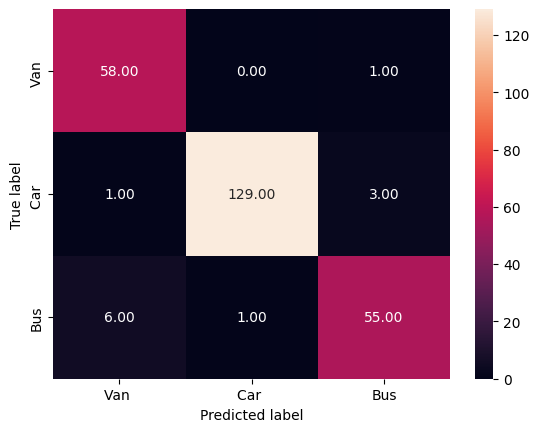

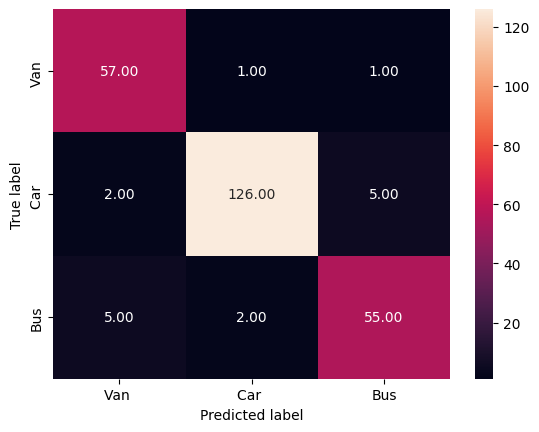

In [94]:
def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    cm = confusion_matrix( y_test, yhat)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(orig_y_test, orig_y_predict, "Van ", "Car ", "Bus", "Original Data Set")

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")
